In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#한글 폰트 안깨지게 설정
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

### 데이터 불러오기(2013-01~2023-09)

In [7]:
data = pd.read_csv('../Final project/data/data.csv', encoding='cp949')
data.head()

,Date,기준금리,주택건설인허가실적,전산업생산지수,주택담보대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,...,회사채(3년),KOSPI_종가,KOSDAQ_종가,국채 거래량,회사채 거래량,GDP,주택전세가격지수,환율,주택 거래량,주택매매가격지수
0,13-Jan,2.75,23952,62.2697,4.55,56,68,62,92.728,104.96,...,3.20,1961.94,503.67,121500624,573916,0.9,82.7,1066.54,39477,70.462
1,13-Feb,2.75,45543,61.6258,4.51,52,76,77,93.038,105.68,...,3.06,2026.49,535.87,99040466,422222,0.9,82.9,1086.06,48592,70.421
2,13-Mar,2.75,75594,76.0634,4.46,58,68,72,92.952,105.26,...,2.95,2004.89,555.02,104760077,481596,0.9,83.2,1103.81,62934,70.389
3,13-Apr,2.75,106509,80.5564,4.40,61,71,74,92.823,104.93,...,2.91,1963.95,563.87,110564496,335381,1.2,83.6,1121.10,77082,70.391
4,13-May,2.50,142055,81.3058,4.33,58,74,70,92.823,104.57,...,2.96,2001.05,577.87,117919540,531677,1.2,83.8,1112.10,89599,70.381


In [8]:
from datetime import datetime
# 주어진 문자열
date_str = '13-Jan'

# 문자열을 datetime 객체로 변환
date_obj = datetime.strptime(date_str, '%y-%b')
print(date_obj)

2013-01-01 00:00:00


In [9]:
from datetime import datetime
for i in range(len(data)):
    data['Date'][i] = datetime.strptime(data['Date'][i], '%y-%b')
data.head()

C:\Users\장희중학부재학통계학과\AppData\Local\Temp\ipykernel_3060\1366291810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'][i] = datetime.strptime(data['Date'][i], '%y-%b')


,Date,기준금리,주택건설인허가실적,전산업생산지수,주택담보대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,...,회사채(3년),KOSPI_종가,KOSDAQ_종가,국채 거래량,회사채 거래량,GDP,주택전세가격지수,환율,주택 거래량,주택매매가격지수
0,2013-01-01 00:00:00,2.75,23952,62.2697,4.55,56,68,62,92.728,104.96,...,3.20,1961.94,503.67,121500624,573916,0.9,82.7,1066.54,39477,70.462
1,2013-02-01 00:00:00,2.75,45543,61.6258,4.51,52,76,77,93.038,105.68,...,3.06,2026.49,535.87,99040466,422222,0.9,82.9,1086.06,48592,70.421
2,2013-03-01 00:00:00,2.75,75594,76.0634,4.46,58,68,72,92.952,105.26,...,2.95,2004.89,555.02,104760077,481596,0.9,83.2,1103.81,62934,70.389
3,2013-04-01 00:00:00,2.75,106509,80.5564,4.40,61,71,74,92.823,104.93,...,2.91,1963.95,563.87,110564496,335381,1.2,83.6,1121.10,77082,70.391
4,2013-05-01 00:00:00,2.50,142055,81.3058,4.33,58,74,70,92.823,104.57,...,2.96,2001.05,577.87,117919540,531677,1.2,83.8,1112.10,89599,70.381


In [10]:
# 'Date' 열을 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2013-01-01 to 2023-09-01
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준금리        129 non-null    float64
 1   주택건설인허가실적   129 non-null    int64  
 2   전산업생산지수     129 non-null    float64
 3   주택담보대출금리    129 non-null    float64
 4   건설업_업황전망    129 non-null    int64  
 5   건설업_매출전망    129 non-null    int64  
 6   건설업_자금사전전망  129 non-null    int64  
 7   소비자물가지수     129 non-null    float64
 8   생산자물가지수     129 non-null    float64
 9   미분양주택현황     129 non-null    int64  
 10  실업률         129 non-null    float64
 11  고용률         129 non-null    float64
 12  M2          129 non-null    int64  
 13  CD금리        129 non-null    float64
 14  국고채(3년)     129 non-null    float64
 15  국고채(10년)    129 non-null    float64
 16  국고채(30년)    129 non-null    float64
 17  회사채(3년)     129 non-null    float64
 18  KOSPI_종가    129 non-null    float64
 19  KOSDAQ_종가 

In [12]:
data.columns

Index(['기준금리', '주택건설인허가실적', '전산업생산지수', '주택담보대출금리', '건설업_업황전망', '건설업_매출전망',
       '건설업_자금사전전망', '소비자물가지수', '생산자물가지수', '미분양주택현황', '실업률', '고용률', 'M2',
       'CD금리', '국고채(3년)', '국고채(10년)', '국고채(30년)', '회사채(3년)', 'KOSPI_종가',
       'KOSDAQ_종가', '국채 거래량', '회사채 거래량', 'GDP', '주택전세가격지수', '환율', '주택 거래량',
       '주택매매가격지수'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

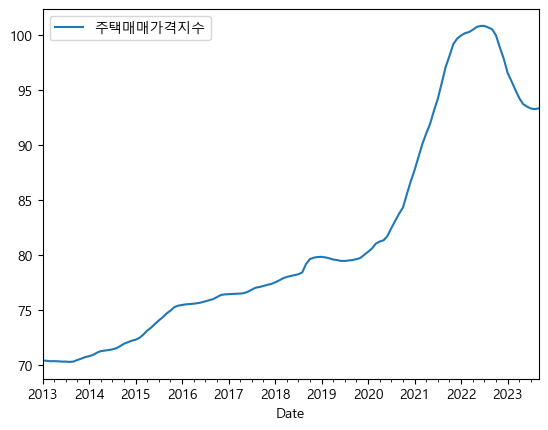

In [13]:
data[['주택매매가격지수']].plot() 

### Scaling

In [14]:
train = data[:int(len(data)*0.9)] # 2013-01 ~ 2022-08
test = data[int(len(data)*0.9):] # 2022-09 ~ 2023-09
train_X = train.iloc[:,:-1]
test_X = test.iloc[:,:-1]
train_y = train.loc[:,'주택매매가격지수']
test_y = test.loc[:, '주택매매가격지수']

In [15]:
train_X

,기준금리,주택건설인허가실적,전산업생산지수,주택담보대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,미분양주택현황,...,국고채(30년),회사채(3년),KOSPI_종가,KOSDAQ_종가,국채 거래량,회사채 거래량,GDP,주택전세가격지수,환율,주택 거래량
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,2.75,23952,62.2697,4.55,56,68,62,92.728,104.96,75180,...,3.310,3.200,1961.94,503.67,121500624,573916,0.9,82.7,1066.54,39477
2013-02-01,2.75,45543,61.6258,4.51,52,76,77,93.038,105.68,73386,...,3.300,3.060,2026.49,535.87,99040466,422222,0.9,82.9,1086.06,48592
2013-03-01,2.75,75594,76.0634,4.46,58,68,72,92.952,105.26,70633,...,3.170,2.950,2004.89,555.02,104760077,481596,0.9,83.2,1103.81,62934
2013-04-01,2.75,106509,80.5564,4.40,61,71,74,92.823,104.93,70201,...,3.150,2.910,1963.95,563.87,110564496,335381,1.2,83.6,1121.10,77082
2013-05-01,2.50,142055,81.3058,4.33,58,74,70,92.823,104.57,66896,...,3.170,2.960,2001.05,577.87,117919540,531677,1.2,83.8,1112.10,89599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,1.50,160842,91.3307,2.98,82,82,83,106.850,118.59,27180,...,3.122,3.631,2695.05,904.75,107003798,277378,0.8,103.2,1235.09,74575
2022-05-01,1.75,209058,96.2150,3.03,80,85,77,107.560,119.43,27375,...,3.173,3.775,2685.90,893.36,112426491,305825,0.8,103.2,1268.38,63769
2022-06-01,1.75,259759,106.4475,3.10,76,91,82,108.220,120.10,27910,...,3.415,4.233,2332.64,745.44,88436458,306211,0.8,103.2,1280.83,60119


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X_sc = pd.DataFrame(sc.fit_transform(train_X), columns=train_X.columns, index=train_X.index)
test_X_sc = pd.DataFrame(sc.transform(test_X), columns=test_X.columns, index = test_X.index)

In [17]:
train_sc = pd.concat([train_X_sc, pd.DataFrame(train_y)], axis=1)
test_sc = pd.concat([test_X_sc, pd.DataFrame(test_y)], axis=1)
data_sc = pd.concat([train_sc, test_sc], axis=0)

In [18]:
data_sc

,기준금리,주택건설인허가실적,전산업생산지수,주택담보대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,미분양주택현황,...,회사채(3년),KOSPI_종가,KOSDAQ_종가,국채 거래량,회사채 거래량,GDP,주택전세가격지수,환율,주택 거래량,주택매매가격지수
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1.948224,-1.419855,-2.101517,2.733120,-1.686189,-1.112205,-3.297926,-1.405410,0.160033,1.668837,...,1.296885,-0.806561,-1.457103,-0.578972,1.832925,0.258087,-2.177609,-1.228859,-2.348345,70.462
2013-02-01,1.948224,-1.296221,-2.143511,2.649595,-2.264881,0.072785,-0.383558,-1.323649,0.306141,1.564015,...,1.053011,-0.626323,-1.233118,-0.892444,0.665127,0.258087,-2.137542,-0.891062,-1.982984,70.421
2013-03-01,1.948224,-1.124145,-1.201905,2.545188,-1.396843,-1.112205,-1.355014,-1.346331,0.220912,1.403160,...,0.861396,-0.686635,-1.099910,-0.812617,1.122211,0.258087,-2.077441,-0.583895,-1.408108,70.389
2013-04-01,1.948224,-0.947121,-0.908876,2.419900,-0.962824,-0.667834,-0.966431,-1.380354,0.153945,1.377919,...,0.791718,-0.800948,-1.038349,-0.731606,-0.003408,0.611686,-1.997307,-0.284688,-0.841007,70.391
2013-05-01,1.550347,-0.743579,-0.860001,2.273730,-1.396843,-0.223463,-1.743596,-1.380354,0.080891,1.184811,...,0.878816,-0.697357,-0.940964,-0.628953,1.507753,0.611686,-1.957240,-0.440435,-0.339283,70.381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,3.141854,-0.654944,0.471583,1.981391,0.194560,0.369032,-1.743596,3.448063,3.218157,1.299857,...,2.932579,0.911155,1.000259,-0.623410,-0.653629,-0.095512,-0.394626,3.294542,-1.112172,93.766
2023-06-01,3.141854,-0.473545,1.389893,2.023154,-0.094786,0.517156,-1.937888,3.445425,3.165396,1.155129,...,3.310583,0.875303,1.078862,-0.420803,-0.220564,-0.095512,-0.434693,2.751506,-1.047237,93.536
2023-07-01,3.141854,-0.370102,0.133651,2.023154,0.194560,0.665280,-0.383558,3.466525,3.228303,0.962254,...,3.451682,1.066011,1.549995,-0.666602,0.093830,-0.095512,-0.434693,2.520828,-1.257234,93.360


In [19]:
# Example using TensorFlow/Keras for '주택매매가격지수'
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Reshape the data for LSTM
X_train_lstm = np.array(train_y).reshape(-1, 1, 1)

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, activation='relu', input_shape=(1, 1)))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train the model
model_lstm.fit(X_train_lstm, train_y, epochs=50, batch_size=1, verbose=2)

# Forecasting
forecast_lstm = model_lstm.predict(np.array(test_y).reshape(-1, 1, 1))

# Calculate RMSE
rmse_lstm = np.sqrt(mean_squared_error(test_y, forecast_lstm))
print(f'RMSE for 주택매매가격지수 (LSTM): {rmse_lstm}')


Epoch 1/50
116/116 - 1s - loss: 3348.9346 - 1s/epoch - 12ms/step
Epoch 2/50
116/116 - 0s - loss: 74.3540 - 148ms/epoch - 1ms/step
Epoch 3/50
116/116 - 0s - loss: 0.0208 - 161ms/epoch - 1ms/step
Epoch 4/50
116/116 - 0s - loss: 0.0209 - 174ms/epoch - 1ms/step
Epoch 5/50
116/116 - 0s - loss: 0.0212 - 216ms/epoch - 2ms/step
Epoch 6/50
116/116 - 0s - loss: 0.0198 - 164ms/epoch - 1ms/step
Epoch 7/50
116/116 - 0s - loss: 0.0199 - 174ms/epoch - 2ms/step
Epoch 8/50
116/116 - 0s - loss: 0.0197 - 170ms/epoch - 1ms/step
Epoch 9/50
116/116 - 0s - loss: 0.0199 - 167ms/epoch - 1ms/step
Epoch 10/50
116/116 - 0s - loss: 0.0205 - 172ms/epoch - 1ms/step
Epoch 11/50
116/116 - 0s - loss: 0.0187 - 166ms/epoch - 1ms/step
Epoch 12/50
116/116 - 0s - loss: 0.0180 - 166ms/epoch - 1ms/step
Epoch 13/50
116/116 - 0s - loss: 0.0182 - 146ms/epoch - 1ms/step
Epoch 14/50
116/116 - 0s - loss: 0.0201 - 160ms/epoch - 1ms/step
Epoch 15/50
116/116 - 0s - loss: 0.0170 - 161ms/epoch - 1ms/step
Epoch 16/50
116/116 - 0s - loss:

In [20]:
print(forecast_lstm)
print(test_y)

[[100.58023 ]
 [100.028206]
 [ 98.9269  ]
 [ 97.915   ]
 [ 96.63651 ]
 [ 95.87436 ]
 [ 95.08209 ]
 [ 94.3455  ]
 [ 93.79645 ]
 [ 93.566795]
 [ 93.39107 ]
 [ 93.33914 ]
 [ 93.39606 ]]
Date
2022-09-01    100.568
2022-10-01    100.014
2022-11-01     98.909
2022-12-01     97.894
2023-01-01     96.612
2023-02-01     95.848
2023-03-01     95.054
2023-04-01     94.316
2023-05-01     93.766
2023-06-01     93.536
2023-07-01     93.360
2023-08-01     93.308
2023-09-01     93.365
Name: 주택매매가격지수, dtype: float64


In [21]:
forecast_lstm = pd.DataFrame(forecast_lstm, index=test_y.index)
forecast_lstm.rename(columns={0:'forecast_lstm'}, inplace=True)

<AxesSubplot:title={'center':'Housing_index forecast'}, xlabel='Date', ylabel='주택매매가격지수'>

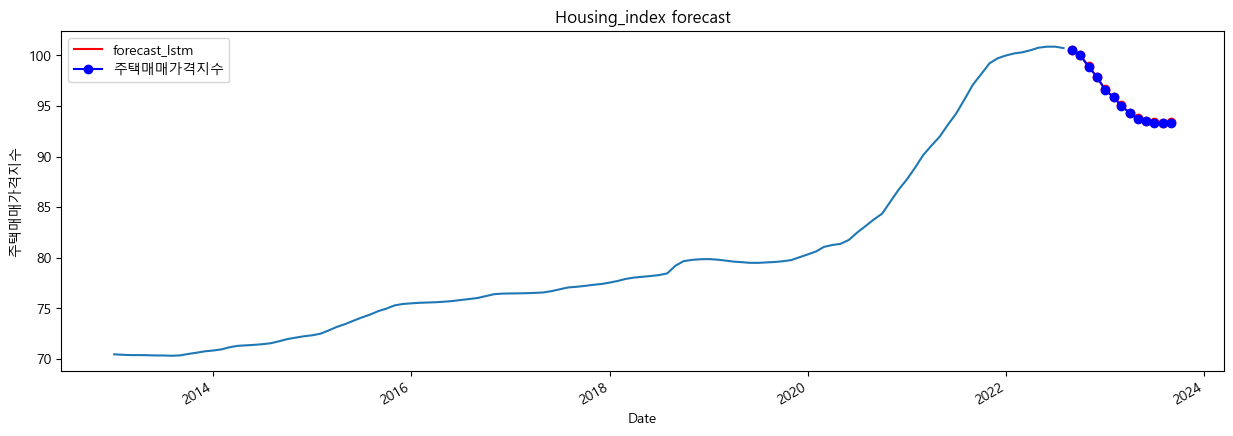

In [22]:
import seaborn as sns
fix, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='Date', y='주택매매가격지수', data=pd.DataFrame(train_y))
chart.set_title('Housing_index forecast')
pd.DataFrame(forecast_lstm).plot(ax=ax, color='red', marker='o', legend=True)
test_y.plot(ax=ax, color='blue', marker='o', legend=True)

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, concatenate
from sklearn.metrics import mean_squared_error

# Assume you have additional features: benchmark_rate, construction_permits, etc.
# Concatenate the additional features with the target variable
X_train_lstm = np.column_stack((train_y, train_X_sc))
X_test_lstm = np.column_stack((test_y, test_X_sc))

# Reshape the data for LSTM
X_train_lstm = X_train_lstm.reshape(-1, 1, X_train_lstm.shape[1])
X_test_lstm = X_test_lstm.reshape(-1, 1, X_test_lstm.shape[1])

# Build the multi-input LSTM model
input_layer = Input(shape=(1, X_train_lstm.shape[2]))
lstm_layer = LSTM(units=50, activation='relu')(input_layer)
output_layer = Dense(units=1)(lstm_layer)

model_lstm_multi_input = Model(inputs=input_layer, outputs=output_layer)
model_lstm_multi_input.compile(optimizer='adam', loss='mse')

# Train the model
model_lstm_multi_input.fit(X_train_lstm, train_y, epochs=50, batch_size=1, verbose=2)

# Forecasting
forecast_lstm_multi_input = model_lstm_multi_input.predict(X_test_lstm)

# Calculate RMSE
rmse_lstm_multi_input = np.sqrt(mean_squared_error(test_y, forecast_lstm_multi_input))
print(f'RMSE for 주택매매가격지수 (Multi-Input LSTM): {rmse_lstm_multi_input}')


Epoch 1/50
116/116 - 1s - loss: 2609.4539 - 1s/epoch - 11ms/step
Epoch 2/50
116/116 - 0s - loss: 4.1400 - 181ms/epoch - 2ms/step
Epoch 3/50
116/116 - 0s - loss: 0.3228 - 179ms/epoch - 2ms/step
Epoch 4/50
116/116 - 0s - loss: 0.1691 - 183ms/epoch - 2ms/step
Epoch 5/50
116/116 - 0s - loss: 0.1478 - 232ms/epoch - 2ms/step
Epoch 6/50
116/116 - 0s - loss: 0.1225 - 184ms/epoch - 2ms/step
Epoch 7/50
116/116 - 0s - loss: 0.1129 - 185ms/epoch - 2ms/step
Epoch 8/50
116/116 - 0s - loss: 0.0987 - 180ms/epoch - 2ms/step
Epoch 9/50
116/116 - 0s - loss: 0.0910 - 179ms/epoch - 2ms/step
Epoch 10/50
116/116 - 0s - loss: 0.0936 - 177ms/epoch - 2ms/step
Epoch 11/50
116/116 - 0s - loss: 0.0816 - 183ms/epoch - 2ms/step
Epoch 12/50
116/116 - 0s - loss: 0.0715 - 181ms/epoch - 2ms/step
Epoch 13/50
116/116 - 0s - loss: 0.0684 - 163ms/epoch - 1ms/step
Epoch 14/50
116/116 - 0s - loss: 0.0583 - 198ms/epoch - 2ms/step
Epoch 15/50
116/116 - 0s - loss: 0.0549 - 194ms/epoch - 2ms/step
Epoch 16/50
116/116 - 0s - loss: 

In [24]:
forecast_lstm_multi_input = pd.DataFrame(forecast_lstm_multi_input, index=test_y.index)
forecast_lstm_multi_input.rename(columns={0:'forecast_lstm_multi_input'}, inplace=True)

<AxesSubplot:title={'center':'Housing_index forecast'}, xlabel='Date', ylabel='주택매매가격지수'>

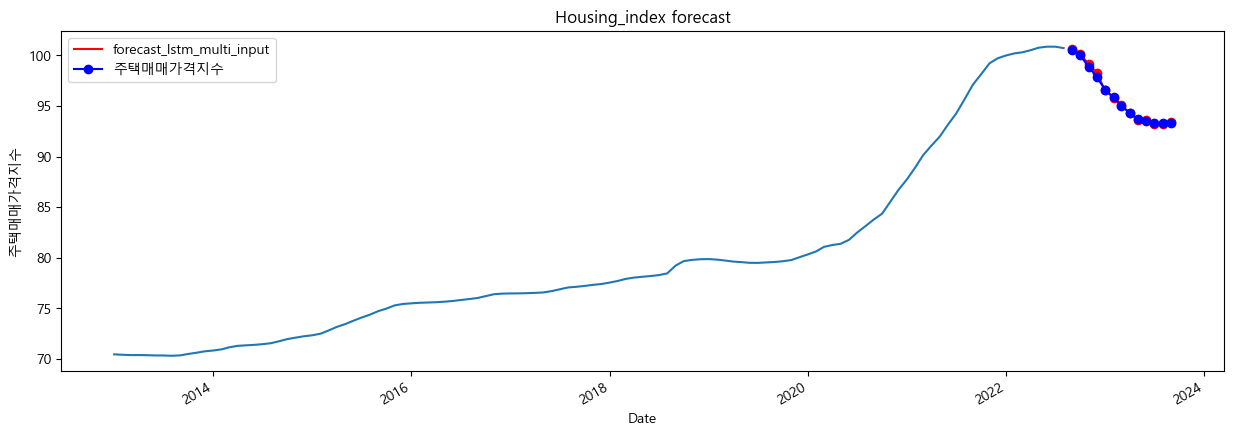

In [25]:
import seaborn as sns
fix, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='Date', y='주택매매가격지수', data=pd.DataFrame(train_y))
chart.set_title('Housing_index forecast')
forecast_lstm_multi_input.plot(ax=ax, color='red', marker='o', legend=True)
test_y.plot(ax=ax, color='blue', marker='o', legend=True)

In [26]:
df_compare = pd.concat([test_y, forecast_lstm_multi_input], axis=1)
df_compare.columns = ['실제 주택매매가겨지수', '예측 매매가격지수']
df_compare

,실제 주택매매가겨지수,예측 매매가격지수
Date,,
2022-09-01,100.568,100.661636
2022-10-01,100.014,100.146828
2022-11-01,98.909,99.157486
2022-12-01,97.894,98.262238
2023-01-01,96.612,96.553162
2023-02-01,95.848,95.838493
2023-03-01,95.054,95.122681
2023-04-01,94.316,94.330658
2023-05-01,93.766,93.663544


In [27]:
import shap
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from sklearn.metrics import mean_squared_error

# Assume you have additional features: benchmark_rate, construction_permits, etc.
# Concatenate the additional features with the target variable
X_train_lstm = np.column_stack((train_y, train_X_sc))
X_test_lstm = np.column_stack((test_y, test_X_sc))

# Reshape the data for LSTM
X_train_lstm = X_train_lstm.reshape(-1, 1, X_train_lstm.shape[1])
X_test_lstm = X_test_lstm.reshape(-1, 1, X_test_lstm.shape[1])

# Build the multi-input LSTM model
input_layer = Input(shape=(1, X_train_lstm.shape[2]))
lstm_layer = LSTM(units=50, activation='relu')(input_layer)
output_layer = Dense(units=1)(lstm_layer)

model_lstm_multi_input = Model(inputs=input_layer, outputs=output_layer)
model_lstm_multi_input.compile(optimizer='adam', loss='mse')

# Train the model
model_lstm_multi_input.fit(X_train_lstm, train_y, epochs=50, batch_size=1, verbose=2)

# Create a SHAP explainer using a background dataset
explainer = shap.Explainer(model_lstm_multi_input, X_train_lstm)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_lstm)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test_lstm)


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Epoch 1/50
116/116 - 1s - loss: 4172.1777 - 1s/epoch - 11ms/step
Epoch 2/50
116/116 - 0s - loss: 23.5186 - 162ms/epoch - 1ms/step
Epoch 3/50
116/116 - 0s - loss: 1.3601 - 161ms/epoch - 1ms/step
Epoch 4/50
116/116 - 0s - loss: 0.2273 - 160ms/epoch - 1ms/step
Epoch 5/50
116/116 - 0s - loss: 0.1210 - 161ms/epoch - 1ms/step
Epoch 6/50
116/116 - 0s - loss: 0.0820 - 162ms/epoch - 1ms/step
Epoch 7/50
116/116 - 0s - loss: 0.0586 - 161ms/epoch - 1ms/step
Epoch 8/50
116/116 - 0s - loss: 0.0495 - 162ms/epoch - 1ms/step
Epoch 9/50
116/116 - 0s - loss: 0.0414 - 163ms/epoch - 1ms/step
Epoch 10/50
116/116 - 0s - loss: 0.0409 - 162ms/epoch - 1ms/step
Epoch 11/50
116/116 - 0s - loss: 0.0361 - 174ms/epoch - 2ms/step
Epoch 12/50
116/116 - 0s - loss: 0.0345 - 166ms/epoch - 1ms/step
Epoch 13/50
116/116 - 0s - loss: 0.0297 - 160ms/epoch - 1ms/step
Epoch 14/50
116/116 - 0s - loss: 0.0261 - 161ms/epoch - 1ms/step
Epoch 15/50
116/116 - 0s - loss: 0.0331 - 163ms/epoch - 1ms/step
Epoch 16/50
116/116 - 0s - loss:

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
import shap
# Create a SHAP explainer using the model's predict function
explainer = shap.Explainer(model_lstm_multi_input.predict, X_train_lstm)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_lstm)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test_lstm)


TypeError: 'numpy.ndarray' object is not callable

In [ ]:
pd.DataFrame(X_train_lstm)

ValueError: Must pass 2-d input. shape=(116, 1, 2)

In [ ]:
import shap
from tensorflow.keras.models import Model

# Assuming X_test_lstm is your input data
X_test_lstm_array = np.array(X_test_lstm)

# Create a function to return model predictions
def model_predict(inputs):
    return model_lstm_multi_input.predict(inputs)

# Create a SHAP explainer
explainer = shap.Explainer(model_predict, X_train_lstm)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_lstm_array)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test_lstm_array)


TypeError: 'numpy.ndarray' object is not callable